### Load in the data

In [1]:
import pandas as pd
import numpy as np
import sys, os

### Set input variables

In [2]:
background = "../ai4all_data/background.csv"
train = "../ai4all_data/train.csv"
output_dir = "output"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### Read in data

In [9]:
data_frame = pd.read_csv(background, low_memory=False)

num_samples = data_frame.shape[0]
assert data_frame['challengeID'].to_dict().values() == range(1, num_samples+1)

data_frame = data_frame.set_index('challengeID')

data_frame = data_frame.replace('missing', -3)
data_frame = data_frame.apply(lambda x: pd.to_numeric(x, errors='ignore'))
# removing all non-numeric elements
data_frame = data_frame.select_dtypes(include = [np.number])

In [10]:
outcome = pd.read_csv(train, low_memory=False)
outcome = outcome.set_index('challengeID')
outcome = outcome.loc[~outcome['gpa'].isnull()]
data_frame.shape[1]

12795

### Pick out the students whose language and literacy skills ('t5c13a') and GPA are both numeric. 
In other words we get rid of the NaN values. 

In [11]:
data_frame = data_frame.loc[data_frame.index.isin(outcome.index.values)]
lang_lit = data_frame.loc[~data_frame['t5c13a'].isnull()]
lang_lit = lang_lit['t5c13a']
Y = outcome.loc[outcome.index.isin(lang_lit.index.values)]
GPA = Y['gpa']

Use scatter plots and histogram to see what the data look like.

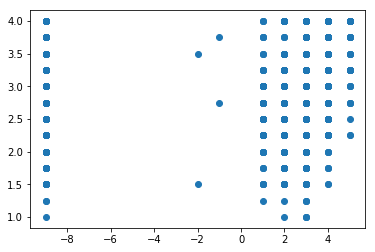

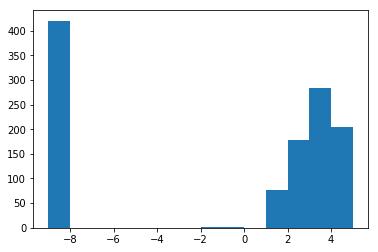

In [13]:
import matplotlib.pyplot as plt
plt.scatter(lang_lit, GPA)
plt.show()
n, bins, patches = plt.hist(lang_lit,14)
plt.show()

If we calculate the average GPAs for students in each category(1,2,3,4,5) we might see the correlation between GPA and their literacy skills.

In [14]:
# Calculate average GPA for students whose language and literacy skills are far below average
one = lang_lit.loc[lang_lit == 1 ]
one_gpa = GPA.loc[GPA.index.isin(one.index.values)]
one_gpa_mean = np.mean(one_gpa)
# Calculate average GPA for students whose language and literacy skills are below average
two = lang_lit.loc[lang_lit == 2]
two_gpa = GPA.loc[GPA.index.isin(two.index.values)]
two_gpa_mean = np.mean(two_gpa)
# Calculate average GPA for students whose language and literacy skills are average
three = lang_lit.loc[lang_lit == 3 ]
three_gpa = GPA.loc[GPA.index.isin(three.index.values)]
three_gpa_mean = np.mean(three_gpa)
# Calculate average GPA for students whose language and literacy skills are above average
four = lang_lit.loc[lang_lit == 4 ]
four_gpa = GPA.loc[GPA.index.isin(four.index.values)]
four_gpa_mean = np.mean(four_gpa)
# Calculate average GPA for students whose language and literacy skills are far above average
five = lang_lit.loc[lang_lit == 5 ]
five_gpa = GPA.loc[GPA.index.isin(five.index.values)]
five_gpa_mean = np.mean(five_gpa)

We plot the average GPA against language and literacy skills.

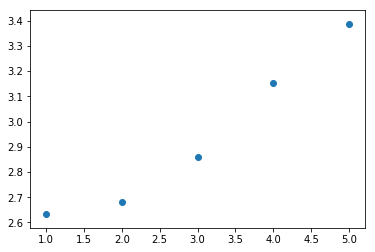

In [15]:
X_train = np.array([1,2,3,4,5])
y_train = np.array([one_gpa_mean,two_gpa_mean,three_gpa_mean,four_gpa_mean,five_gpa_mean])
plt.scatter(X_train, y_train)
plt.show()

**Let's do linear regression with `numpy.polyfit`**


slope : 0.198549104757
intercept : 2.34676160273
mean square error : 0.00415235745725


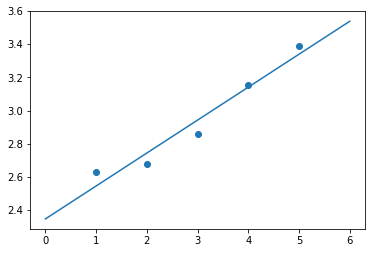

In [39]:
coef = np.polyfit(X_train,y_train,1)
print('slope : {}'.format(coef[0]))
print('intercept : {}'.format(coef[1]))


fig = plt.figure()
ax = plt.axes()
plt.scatter(X_train, y_train)
x = np.linspace(0, 6, 100)
ax.plot(x, coef[0]*x + coef[1]);

mse = np.mean(((coef[0]*X_train + coef[1] - y_train) ** 2))
print('mean square error : {}'.format(mse))

**We can also do linear regression with `scipy.stats.linregress`**

In [43]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train, y_train)

print('slope : {}'.format(slope))
print('intercept : {}'.format(intercept))
print('r-squared : {}'.format(r_value**2))

slope : 0.198549104757
intercept : 2.34676160273
r-squared : 0.949969096234


### We can do the same analysis for science and social skills ('t5c13b')

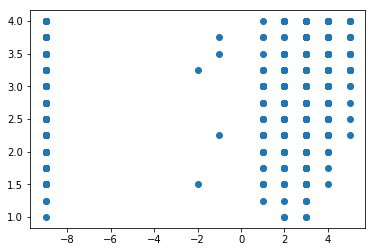

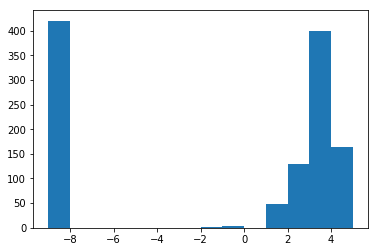

In [18]:
science_social = data_frame.loc[~data_frame['t5c13b'].isnull()]
science_social = science_social['t5c13b']
Y = outcome.loc[outcome.index.isin(science_social.index.values)]
GPA = Y['gpa']
plt.scatter(science_social, GPA)
plt.show()
n, bins, patches = plt.hist(science_social,14)
plt.show()

In [19]:
# Calculate average GPA for students whose science and social skills are far below average
one = science_social.loc[science_social == 1 ]
one_gpa = GPA.loc[GPA.index.isin(one.index.values)]
one_gpa_mean = np.mean(one_gpa)
# Calculate average GPA for students whose science and social skills are below average
two = science_social.loc[science_social == 2]
two_gpa = GPA.loc[GPA.index.isin(two.index.values)]
two_gpa_mean = np.mean(two_gpa)
# Calculate average GPA for students whose science and social skills are average
three = science_social.loc[science_social == 3 ]
three_gpa = GPA.loc[GPA.index.isin(three.index.values)]
three_gpa_mean = np.mean(three_gpa)
# Calculate average GPA for students whose science and social skills are above average
four = science_social.loc[science_social == 4 ]
four_gpa = GPA.loc[GPA.index.isin(four.index.values)]
four_gpa_mean = np.mean(four_gpa)
# Calculate average GPA for students whose science and social skills are far above average
five = science_social.loc[science_social == 5 ]
five_gpa = GPA.loc[GPA.index.isin(five.index.values)]
five_gpa_mean = np.mean(five_gpa)

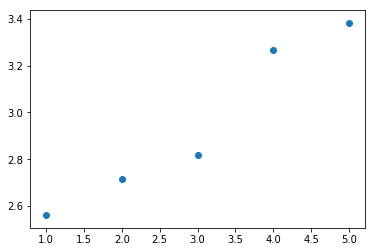

In [20]:
plt.scatter([1,2,3,4,5], [one_gpa_mean,two_gpa_mean,three_gpa_mean,four_gpa_mean,five_gpa_mean])
plt.show()

### We can do the same analysis for math skills ('t5c13b')

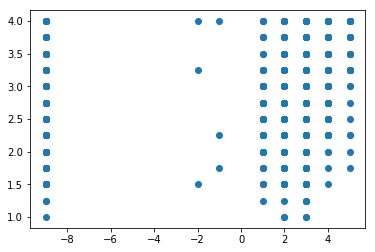

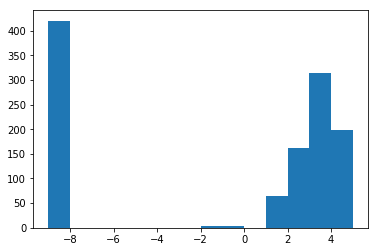

In [22]:
math = data_frame.loc[~data_frame['t5c13c'].isnull()]
math = math['t5c13c']
Y = outcome.loc[outcome.index.isin(math.index.values)]
GPA = Y['gpa']
plt.scatter(math, GPA)
plt.show()
n, bins, patches = plt.hist(math,14)
plt.show()

In [23]:
# Calculate average GPA for students whose math skills are far below average
one = math.loc[math == 1 ]
one_gpa = GPA.loc[GPA.index.isin(one.index.values)]
one_gpa_mean = np.mean(one_gpa)
# Calculate average GPA for students whose math skills are below average
two = math.loc[math == 2]
two_gpa = GPA.loc[GPA.index.isin(two.index.values)]
two_gpa_mean = np.mean(two_gpa)
# Calculate average GPA for students whose math skills are average
three = math.loc[math == 3 ]
three_gpa = GPA.loc[GPA.index.isin(three.index.values)]
three_gpa_mean = np.mean(three_gpa)
# Calculate average GPA for students whose math skills are above average
four = math.loc[math == 4 ]
four_gpa = GPA.loc[GPA.index.isin(four.index.values)]
four_gpa_mean = np.mean(four_gpa)
# Calculate average GPA for students whose math skills are far above average
five = math.loc[math == 5 ]
five_gpa = GPA.loc[GPA.index.isin(five.index.values)]
five_gpa_mean = np.mean(five_gpa)

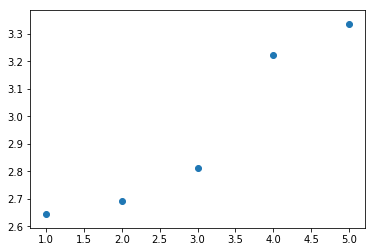

In [24]:
plt.scatter([1,2,3,4,5], [one_gpa_mean,two_gpa_mean,three_gpa_mean,four_gpa_mean,five_gpa_mean])
plt.show()